In [20]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-11-12,0.352431,0.361111,0.340278,0.347222,0.216159,99172800
1,1987-11-13,0.347222,0.348958,0.335069,0.335069,0.208593,58492800
2,1987-11-16,0.338542,0.345486,0.329861,0.331597,0.206431,59472000
3,1987-11-17,0.324653,0.329861,0.314236,0.324653,0.202109,69321600
4,1987-11-18,0.329861,0.333333,0.312500,0.333333,0.207512,89308800
...,...,...,...,...,...,...,...
8935,2023-05-01,306.970001,308.600006,305.149994,305.559998,304.893494,21294100
8936,2023-05-02,307.760010,309.179993,303.910004,305.410004,304.743805,26404400
8937,2023-05-03,306.619995,308.609985,304.089996,304.399994,303.736023,22360800
8938,2023-05-04,306.239990,307.760010,303.399994,305.410004,304.743805,22519900


In [21]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1987-11-12,0.347222
1,1987-11-13,0.335069
2,1987-11-16,0.331597
3,1987-11-17,0.324653
4,1987-11-18,0.333333
...,...,...
8935,2023-05-01,305.559998
8936,2023-05-02,305.410004
8937,2023-05-03,304.399994
8938,2023-05-04,305.410004


In [22]:
df['Date']

0       1987-11-12
1       1987-11-13
2       1987-11-16
3       1987-11-17
4       1987-11-18
           ...    
8935    2023-05-01
8936    2023-05-02
8937    2023-05-03
8938    2023-05-04
8939    2023-05-05
Name: Date, Length: 8940, dtype: object

In [23]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [24]:
df

,Date,Close
0,1987-11-12,0.347222
1,1987-11-13,0.335069
2,1987-11-16,0.331597
3,1987-11-17,0.324653
4,1987-11-18,0.333333
...,...,...
8935,2023-05-01,305.559998
8936,2023-05-02,305.410004
8937,2023-05-03,304.399994
8938,2023-05-04,305.410004


In [25]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Windows\Temp\ipykernel_1340\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1987-11-12
1      1987-11-13
2      1987-11-16
3      1987-11-17
4      1987-11-18
          ...    
8935   2023-05-01
8936   2023-05-02
8937   2023-05-03
8938   2023-05-04
8939   2023-05-05
Name: Date, Length: 8940, dtype: datetime64[ns]

In [26]:
df.index = df.pop('Date')
df

,Close
Date,
1987-11-12,0.347222
1987-11-13,0.335069
1987-11-16,0.331597
1987-11-17,0.324653
1987-11-18,0.333333
...,...
2023-05-01,305.559998
2023-05-02,305.410004
2023-05-03,304.399994


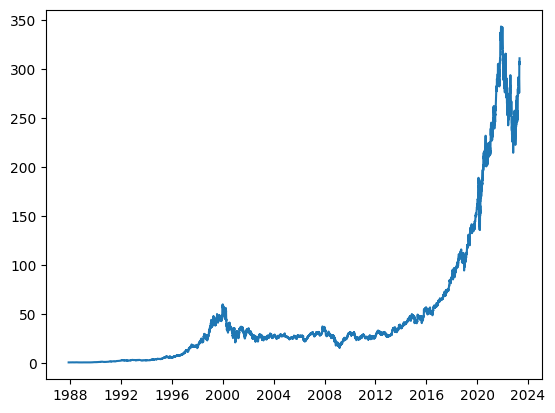

In [27]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [28]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [29]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

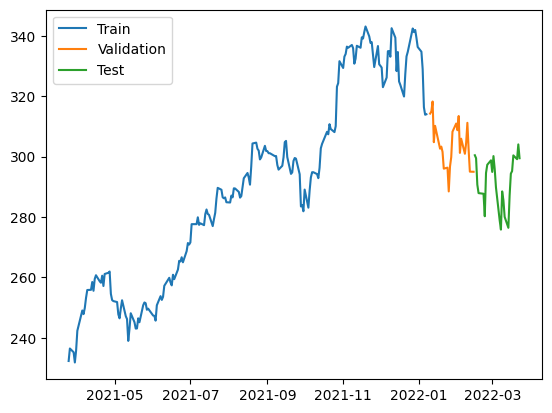

In [30]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 81ms/step - loss: 84571.2031 - mean_absolute_error: 289.0710 - val_loss: 92223.5234 - val_mean_absolute_error: 303.5960
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 84256.1719 - mean_absolute_error: 288.5253 - val_loss: 91852.9688 - val_mean_absolute_error: 302.9851
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 83886.1094 - mean_absolute_error: 287.8808 - val_loss: 91427.2031 - val_mean_absolute_error: 302.2817
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 83461.8750 - mean_absolute_error: 287.1465 - val_loss: 90959.7734 - val_mean_absolute_error: 301.5076
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 83011.4922 - mean_absolute_error: 286.3578 - val_loss: 90446.9766 - val_mean_absolute_error: 300.6559
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 82484.5703 - mean_absolute_error: 285.4367 - val_loss: 89838.0

7/7 [==============================] - 0s 2ms/step


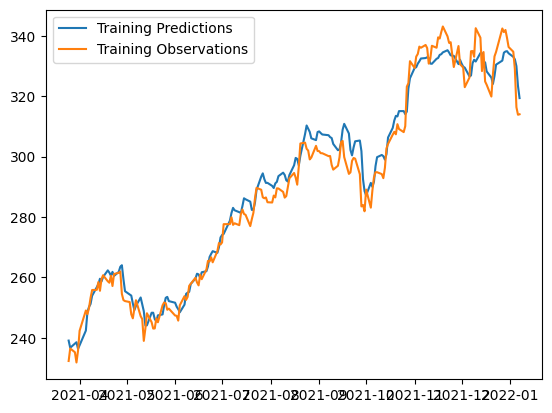

In [32]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 17ms/step


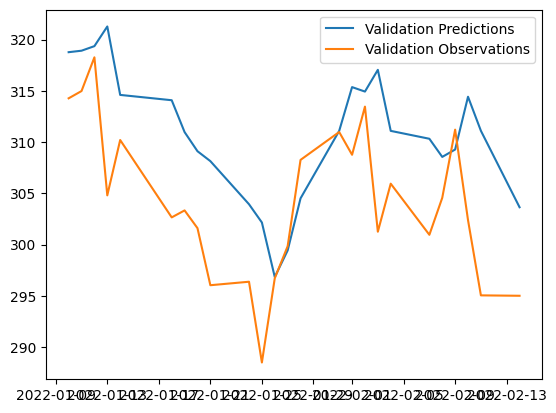

In [33]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 19ms/step


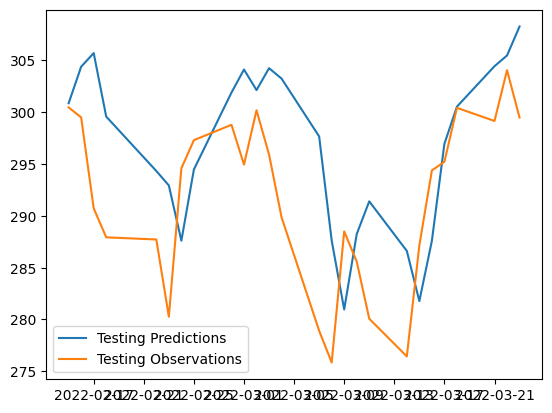

In [34]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

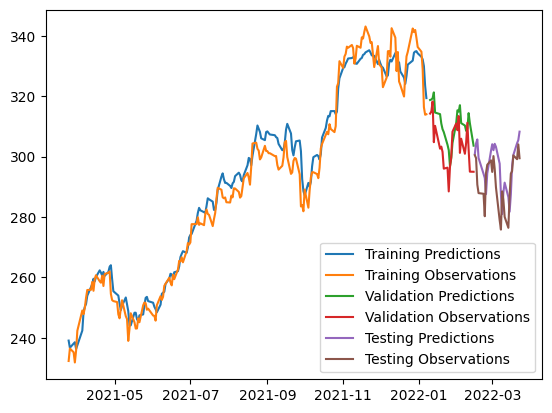

In [35]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [36]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


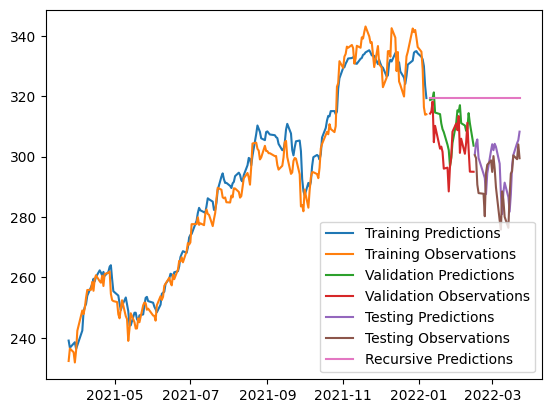

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])